In [1]:
import os
from fnmatch import fnmatch
from trainData_featExt_glcm import trainData_featExt_glcm
from trainData_featExt_gabor import trainData_featExt_gabor
import numpy as np
from PIL import Image
from filtering.filters import Median
from feature_extraction.glcm import Glcm
from feature_extraction.gabor import Gabor
import sklearn
import time
from gmm import Gmm
from sklearn import preprocessing
import pickle

In [ ]:
test_samples_feats_matrix_Gabor = np.load("test_samples_feats_matrix_Gabor.npy")
test_samples_feats_matrix_GLCM = np.load("test_samples_feats_matrix_GLCM.npy")
test_samples_feats_matrix_LBP = np.load("test_samples_feats_matrix_LBP.npy")


In [2]:
valid_samples_feats_matrix_Gabor = np.load("valid_samples_feats_matrix_Gabor.npy")
valid_samples_feats_matrix_GLCM = np.load("valid_samples_feats_matrix_GLCM.npy")
valid_samples_feats_matrix_LBP = np.load("valid_samples_feats_matrix_LBP.npy")

In [3]:
train_samples_feats_matrix_Gabor = np.load("train_samples_feats_matrix_Gabor.npy")
train_samples_feats_matrix_GLCM = np.load("train_samples_feats_matrix_GLCM.npy")
train_samples_feats_matrix_LBP = np.load("train_samples_feats_matrix_LBP.npy")

In [4]:
svm_model_Gabor = pickle.load( open( "SVM_Gabor_[0.2, 0.1]", "rb" ))

In [5]:
svm_model_LBP = pickle.load( open( "SVM_LBP_[0.2, 0.01]", "rb" ))

In [6]:
svm_model_GLCM = pickle.load( open( "SVM_GLCM_[0.2, 0.01]", "rb" ))

In [7]:
#Ground truth
y1 = np.repeat(+1, 6000) #normal
y2 = np.repeat(-1, 4000) #abnormal
y = np.concatenate((y1,y2))

In [8]:
#Predict labels of new data points
y_predict_Gabor = svm_model_Gabor.predict(valid_samples_feats_matrix_Gabor)
y_predict_score_Gabor = svm_model_Gabor.decision_function(valid_samples_feats_matrix_Gabor)

In [9]:
#Predict labels of new data points
y_predict_LBP = svm_model_LBP.predict(valid_samples_feats_matrix_LBP)
y_predict_score_LBP = svm_model_LBP.decision_function(valid_samples_feats_matrix_LBP)

In [10]:
#Predict labels of new data points
y_predict_GLCM = svm_model_GLCM.predict(valid_samples_feats_matrix_GLCM)
y_predict_score_GLCM = svm_model_GLCM.decision_function(valid_samples_feats_matrix_GLCM)

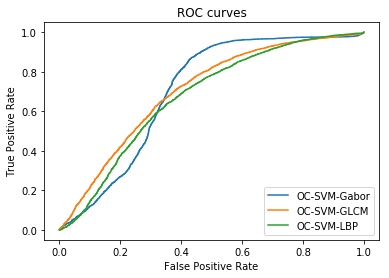

In [11]:
import matplotlib.pyplot as pl
import matplotlib
from skimage import io


Gabor_fpr,Gabor_tpr,Gabor_thresh = sklearn.metrics.roc_curve(y,y_predict_score_Gabor)
GLCM_fpr,GLCM_tpr,GLCM_thresh = sklearn.metrics.roc_curve(y,y_predict_score_GLCM)
LBP_fpr,LBP_tpr,LBP_thresh = sklearn.metrics.roc_curve(y,y_predict_score_LBP)

f,ax = pl.subplots(1,1)
ax.plot(Gabor_fpr,Gabor_tpr,label="OC-SVM-Gabor")
ax.plot(GLCM_fpr,GLCM_tpr,label="OC-SVM-GLCM")
ax.plot(LBP_fpr,LBP_tpr,label="OC-SVM-LBP")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curves")
ax.legend(loc="lower right")

io.show()

In [12]:
f.savefig('OCSVM_GLCM-vs-Gabor-vs-LBP_valid.png')